In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

## Preprocessamento dos dados

### 1. Carregar o dataset

In [2]:
df = pd.read_csv(
'https://waf.cs.illinois.edu/discovery/berkeley.csv', dtype = str, sep = ',',encoding = 'utf-8'
)

### 2. Verificar suas informações gerais

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       12763 non-null  object
 1   Major      12763 non-null  object
 2   Gender     12763 non-null  object
 3   Admission  12763 non-null  object
dtypes: object(4)
memory usage: 399.0+ KB


### 3. Verificar dados ausentes

In [4]:
df.isnull().sum()

Year         0
Major        0
Gender       0
Admission    0
dtype: int64

### 4. Verificar e remover outliers

#### Logo abaixo foi retirado a coluna 'Year' pois todas as linhas possuem o mesmo valor: '1973', considerando o contexto e o que queremos responder esta coluna se torna irrelevante para a análise.

In [5]:
#Retirando a coluna 'Year'
df = df.drop('Year', axis = 1)

#### Contando os valores agrupados por Área (Major)
##### Utilizei o '**.reset_index()**', para retomar o Major, Gender e Admission como coluna, saindo de um dataframe multiindex para um dataframe com indices unidimensionais.



In [6]:
# Agrupando 
df_gb = df.groupby(df['Major']).value_counts().reset_index()
df_gb

,Major,Gender,Admission,count
0,A,M,Accepted,825
1,A,M,Rejected,313
2,A,F,Accepted,89
3,A,F,Rejected,19
4,B,M,Accepted,353
5,B,M,Rejected,207
6,B,F,Accepted,17
7,B,F,Rejected,8
8,C,F,Rejected,392
9,C,M,Rejected,205


#### A função **pivot_table** pertencente a biblioteca pandas é uma ferramenta poderosa do qual podemos reorganizar dados, cruzando informações entre colunas

In [7]:
df_pivot = df_gb.pivot_table(index='Major', columns=['Gender','Admission'], values='count', aggfunc='sum')
df_pivot

Gender           F                 M         
Admission Accepted Rejected Accepted Rejected
Major                                        
A               89       19      825      313
B               17        8      353      207
C              201      392      120      205
D              131      244      138      279
E               94      299       53      138
F               25      316       22      351
Other          937     1549     2227     3211

In [8]:
# Imprima os nomes dos níveis do índice das colunas
print("Nomes dos níveis das colunas:", df_pivot.columns.names)

# Imprima os níveis do índice das colunas
print("\nNíveis das colunas:", df_pivot.columns.levels)

Nomes dos níveis das colunas: ['Gender', 'Admission']

Níveis das colunas: [['F', 'M'], ['Accepted', 'Rejected']]


In [9]:
df_pivot.columns = df_pivot.columns.map(lambda x: f'{x[1]}_{x[0]}')

print(df_pivot)

       Accepted_F  Rejected_F  Accepted_M  Rejected_M
Major                                                
A              89          19         825         313
B              17           8         353         207
C             201         392         120         205
D             131         244         138         279
E              94         299          53         138
F              25         316          22         351
Other         937        1549        2227        3211


In [10]:
df_pivot = df_pivot.reset_index()

In [11]:
df_pivot

,Major,Accepted_F,Rejected_F,Accepted_M,Rejected_M
0,A,89,19,825,313
1,B,17,8,353,207
2,C,201,392,120,205
3,D,131,244,138,279
4,E,94,299,53,138
5,F,25,316,22,351
6,Other,937,1549,2227,3211


In [12]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Major       7 non-null      object
 1   Accepted_F  7 non-null      int64 
 2   Rejected_F  7 non-null      int64 
 3   Accepted_M  7 non-null      int64 
 4   Rejected_M  7 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 412.0+ bytes


In [13]:
df_pivot.describe()

,Accepted_F,Rejected_F,Accepted_M,Rejected_M
count,7.000000,7.000000,7.000000,7.000000
mean,213.428571,403.857143,534.000000,672.000000
std,325.151174,526.082829,796.388515,1121.930033
min,17.000000,8.000000,22.000000,138.000000
25%,57.000000,131.500000,86.500000,206.000000
50%,94.000000,299.000000,138.000000,279.000000
75%,166.000000,354.000000,589.000000,332.000000
max,937.000000,1549.000000,2227.000000,3211.000000


<Axes: >

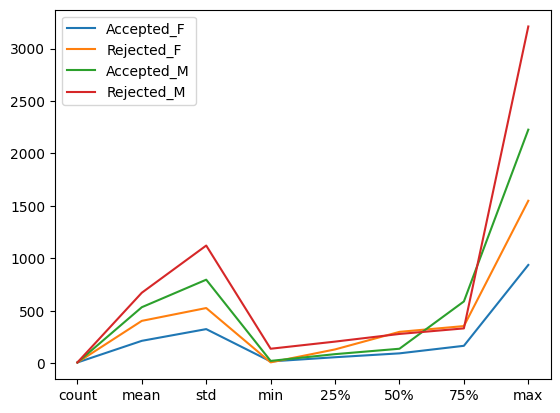

In [14]:
df_pivot.describe().plot()

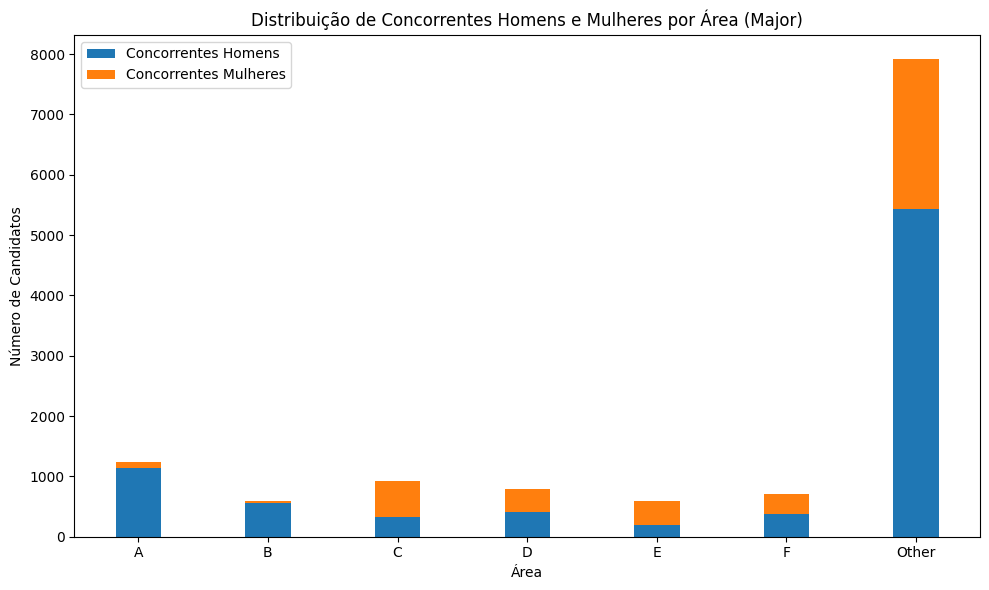

In [15]:
plt.figure(figsize=(10, 6))
width = 0.35
majors = df_pivot['Major'].unique()
index = range(len(majors))
applicants_male = df_pivot['Accepted_M'] + df_pivot['Rejected_M']
applicants_female = df_pivot['Accepted_F'] + df_pivot['Rejected_F']
plt.bar(index, applicants_male, width, label='Concorrentes Homens')
plt.bar(index, applicants_female, width, bottom=applicants_male, label='Concorrentes Mulheres')
plt.xlabel('Área')
plt.ylabel('Número de Candidatos')
plt.title('Distribuição de Concorrentes Homens e Mulheres por Área (Major)')
plt.xticks(index, majors)
plt.legend()
plt.tight_layout()
plt.show()

##### Outlier

##### Considerando as informações da tabela **df_pivot**, o output do **df_pivot.describe()** (observar valor máximo do describe) e por fim a imagem plotada da distribuição dos dados utilizando o mesmo dataframe, conseguimos identificar que o valor "Others" da coluna 'Major', possui discrepância com os demais trazendo desequilíbrio e viés para a análise. Esse valor "Others" representa as demais Áreas (79 Majors restantes de 85) disponíveis em 1973 para concorrer a graduação da Universidade de Berkeley. Portanto faz-se necessário retirar o valor "Others" para não inviabilizar a análise.

In [16]:
# Retirando a ultima linha do Dataframe df_refined , excluindo a linha que contém o valor de "Others" na coluna 'Major'
df_pivot = df_pivot.drop(6)
df_pivot

,Major,Accepted_F,Rejected_F,Accepted_M,Rejected_M
0,A,89,19,825,313
1,B,17,8,353,207
2,C,201,392,120,205
3,D,131,244,138,279
4,E,94,299,53,138
5,F,25,316,22,351


### 5. Verificar e corrigir inconsistências

In [17]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Major       6 non-null      object
 1   Accepted_F  6 non-null      int64 
 2   Rejected_F  6 non-null      int64 
 3   Accepted_M  6 non-null      int64 
 4   Rejected_M  6 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 372.0+ bytes


In [18]:
df_pivot = df_pivot.rename(columns={
'Accepted_F':'Accepted_Female', 
'Rejected_F':'Rejected_Female',
'Accepted_M':'Accepted_Male',
'Rejected_M':'Rejected_Male'
})

In [19]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Major            6 non-null      object
 1   Accepted_Female  6 non-null      int64 
 2   Rejected_Female  6 non-null      int64 
 3   Accepted_Male    6 non-null      int64 
 4   Rejected_Male    6 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 372.0+ bytes


### 6. Criar novas variáveis derivadas das existentes

In [20]:
df_pivot['Total_Accepted'] = df_pivot['Accepted_Female'] + df_pivot['Accepted_Male']
df_pivot['Total_Rejected'] = df_pivot['Rejected_Female'] + df_pivot['Rejected_Male']

In [21]:
df_pivot['Applicants_Female'] = df_pivot['Accepted_Female'] + df_pivot['Rejected_Female']
df_pivot['Applicants_Male'] = df_pivot['Accepted_Male'] + df_pivot['Rejected_Male']

In [22]:
df_pivot['Total_Applicants'] = df_pivot['Applicants_Female'] + df_pivot['Applicants_Male']

In [23]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Major              6 non-null      object
 1   Accepted_Female    6 non-null      int64 
 2   Rejected_Female    6 non-null      int64 
 3   Accepted_Male      6 non-null      int64 
 4   Rejected_Male      6 non-null      int64 
 5   Total_Accepted     6 non-null      int64 
 6   Total_Rejected     6 non-null      int64 
 7   Applicants_Female  6 non-null      int64 
 8   Applicants_Male    6 non-null      int64 
 9   Total_Applicants   6 non-null      int64 
dtypes: int64(9), object(1)
memory usage: 612.0+ bytes


### 7. Converter tipos de dados

In [24]:
df_refined = df_pivot
df_refined['Major'] = df_refined['Major'].astype('category')

### 8. Salvar o dataset pré-processado

#### Salvando o Dataframe preprocessado para as análises futuras.

In [25]:
#### Gerando o arquivo

def verificar_diretorio(nome_diretorio:str):
    """
    Cria uma pasta, se a mesma não existir.
    """
    if not os.path.exists(nome_diretorio):
        os.mkdir(nome_diretorio)
    return None

verificar_diretorio('dataset')
df_refined.to_csv("dataset/berkeley_preprocessed.csv", index = False)

## Análise de Dados

Considerando todos os tratamentos feitos anteriormente (alguns até respondem alguns itens nesta etapa), fica muito mais fácil realizar as análises e plotagem de gráficos.


### 1. Carregar o dataset e verificar suas informações gerais;

In [26]:
df_pro = pd.read_csv('dataset/berkeley_preprocessed.csv', sep = ',', encoding = 'utf-8')
df_pro

,Major,Accepted_Female,Rejected_Female,Accepted_Male,Rejected_Male,Total_Accepted,Total_Rejected,Applicants_Female,Applicants_Male,Total_Applicants
0,A,89,19,825,313,914,332,108,1138,1246
1,B,17,8,353,207,370,215,25,560,585
2,C,201,392,120,205,321,597,593,325,918
3,D,131,244,138,279,269,523,375,417,792
4,E,94,299,53,138,147,437,393,191,584
5,F,25,316,22,351,47,667,341,373,714


In [27]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Major              6 non-null      object
 1   Accepted_Female    6 non-null      int64 
 2   Rejected_Female    6 non-null      int64 
 3   Accepted_Male      6 non-null      int64 
 4   Rejected_Male      6 non-null      int64 
 5   Total_Accepted     6 non-null      int64 
 6   Total_Rejected     6 non-null      int64 
 7   Applicants_Female  6 non-null      int64 
 8   Applicants_Male    6 non-null      int64 
 9   Total_Applicants   6 non-null      int64 
dtypes: int64(9), object(1)
memory usage: 612.0+ bytes


### 2. Examinar as estatísticas descritivas das variáveis numéricas, verificando médias,
medianas, desvios padrão, mínimos e máximos.

In [28]:
df_pro.describe()

,Accepted_Female,Rejected_Female,Accepted_Male,Rejected_Male,Total_Accepted,Total_Rejected,Applicants_Female,Applicants_Male,Total_Applicants
count,6.000000,6.0000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,92.833333,213.0000,251.833333,248.833333,344.666667,461.833333,305.833333,500.666667,806.500000
std,68.592760,161.6589,303.792967,79.272736,302.901084,168.822293,206.924543,334.593883,250.170942
min,17.000000,8.0000,22.000000,138.000000,47.000000,215.000000,25.000000,191.000000,584.000000
25%,41.000000,75.2500,69.750000,205.500000,177.500000,358.250000,166.250000,337.000000,617.250000
50%,91.500000,271.5000,129.000000,243.000000,295.000000,480.000000,358.000000,395.000000,753.000000
75%,121.750000,311.7500,299.250000,304.500000,357.750000,578.500000,388.500000,524.250000,886.500000
max,201.000000,392.0000,825.000000,351.000000,914.000000,667.000000,593.000000,1138.000000,1246.000000


### 3. Analisar a distribuição de frequências das variáveis categóricas.


No dataframe original temos a coluna **'Major'** , **'Gender'** e **'Admission'** consideradas como categóricas.\
No arquivo preprocessado, o dataframe possui a frequência destes, sendo representados respectivamente pelas colunas **'Total_Applicants'** para representação da frequencia de **'Major'**, **'Applicants_Female'** e **'Applicants_Male'** para representação da frequencia de **'Gender'** e por último **'Admission'** , sendo ele representado pelas as colunas **'Total_Accepted'**, para o Total de Aceitos e **'Total_Rejected'**, para o Total de Reprovados.

Frequencia de Departamentos

<Figure size 600x600 with 0 Axes>

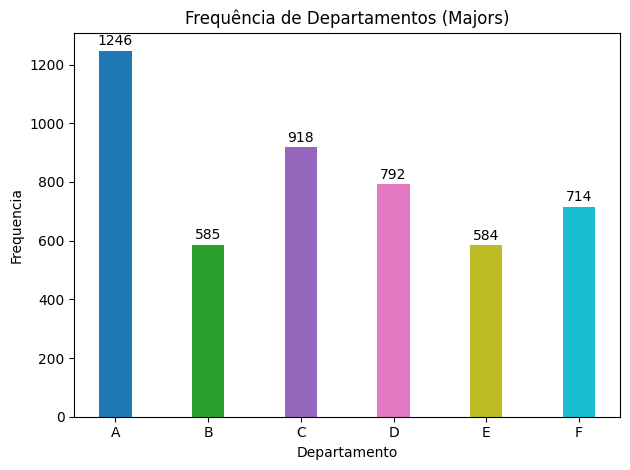

In [29]:
plt.figure(figsize=(6, 6))
width = 0.35
majors = df_pro['Major'].unique()
freq_majors = df_pro['Total_Applicants'].values
index = range(len(freq_majors))
num_majors = len(df_pro['Major'])
colors = plt.cm.tab10(np.linspace(0, 1, num_majors))
fig, ax = plt.subplots()
bar_major = ax.bar(index, df_pro['Total_Applicants'], width, label='Freq.por Area (Major)', color= colors)
plt.bar_label(bar_major, padding=2) 
plt.xlabel('Departamento')
plt.ylabel('Frequencia')
plt.title('Frequência de Departamentos (Majors)')
plt.xticks(index, majors)
plt.tight_layout()
plt.show()

Frequência de Gêneros

In [30]:
# Frequencia de Gender
df_gender = df_pro[['Applicants_Female','Applicants_Male']].sum()
df_gender = df_gender.rename(index={'Applicants_Female': 'Mulheres', 'Applicants_Male': 'Homens'})
df_gender

Mulheres    1835
Homens      3004
dtype: int64

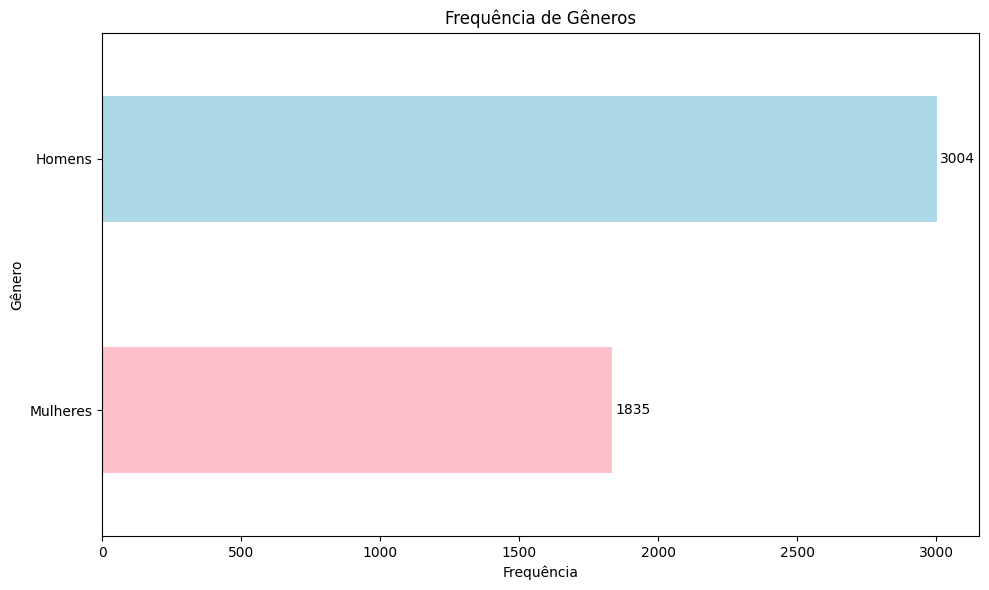

In [31]:
plt.figure(figsize=(10, 6))
width = 0.35
barh_gender = df_gender.plot(kind='barh', color=['pink', 'lightblue'])
plt.xlabel('Frequência')
plt.ylabel('Gênero')
plt.title('Frequência de Gêneros')
plt.bar_label(barh_gender.containers[0], padding=2)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Frequência de Admissões

In [32]:
df_admission = df_pro[['Total_Accepted','Total_Rejected']].sum()
df_admission = df_admission.rename(index={'Total_Accepted': 'Aceitas', 'Total_Rejected': 'Rejeitadas'})
df_admission

Aceitas       2068
Rejeitadas    2771
dtype: int64

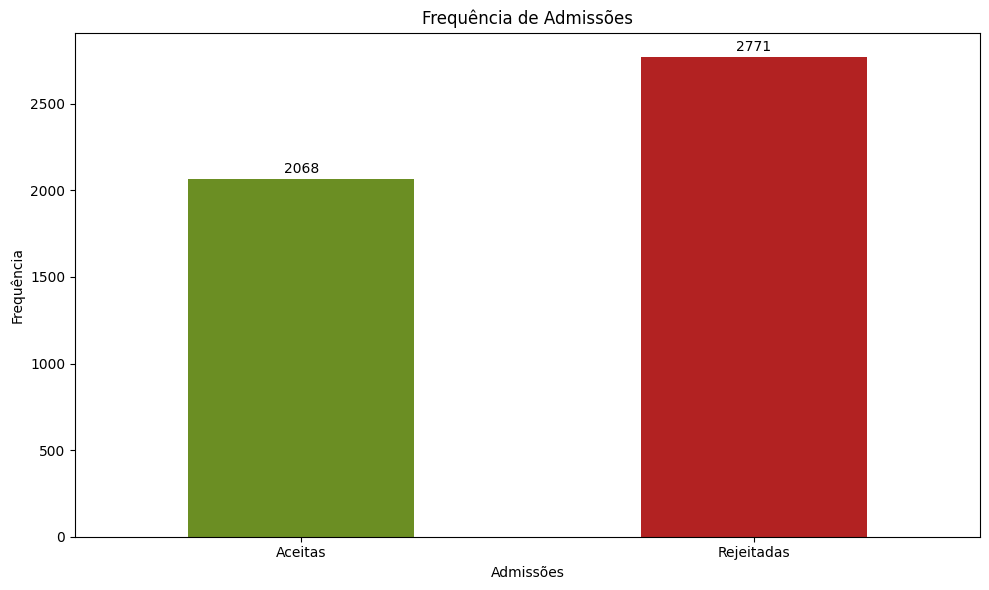

In [33]:
plt.figure(figsize=(10, 6))
width = 0.35
bar_admission = df_admission.plot(kind='bar', color=['olivedrab', 'firebrick'])
plt.xlabel('Admissões')
plt.ylabel('Frequência')
plt.title('Frequência de Admissões')
plt.bar_label(bar_admission.containers[0], padding=2)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 4. Verificar a representatividade de homens e mulheres nas aplicações e admissões por departamento.

<Figure size 1600x1600 with 0 Axes>

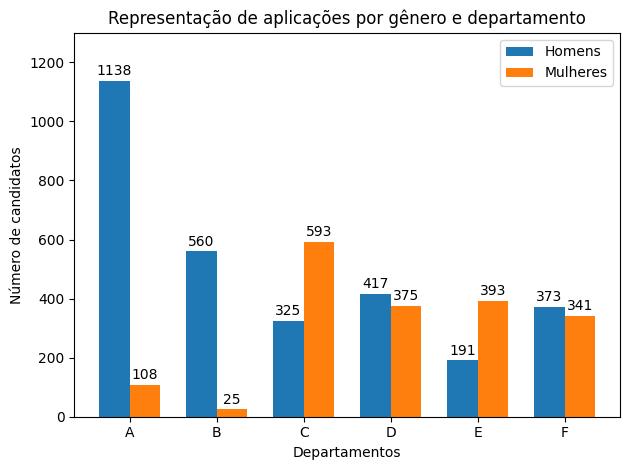

In [34]:
plt.figure(figsize=(16, 16))
width = 0.35
majors = df_pro['Major'].unique()
index = np.arange(len(majors))  
fig, ax = plt.subplots()
bar_m = ax.bar(index - width/2, df_pro['Applicants_Male'].values, width, label='Homens')
bar_f = ax.bar(index + width/2, df_pro['Applicants_Female'].values, width, label='Mulheres')
plt.xlabel('Departamentos')
plt.ylabel('Número de candidatos')
plt.ylim(0, 1300)
plt.title('Representação de aplicações por gênero e departamento')
plt.bar_label(bar_m, padding=2)
plt.bar_label(bar_f, padding=2)
plt.xticks(index, majors)
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
colunas = ['Major', 'Applicants_Female', 'Applicants_Male', 'Accepted_Female', 'Accepted_Male']
df_pro2 = df_pro[colunas]
df_pro2['Accepted_Female_pct'] = df_pro2.loc[df_pro2['Accepted_Female'] > 0, 'Accepted_Female_pct'] = (df_pro2['Accepted_Female'] / df_pro2['Applicants_Female']) * 100
df_pro2['Accepted_Male_pct'] = df_pro2.loc[df_pro2['Accepted_Male'] > 0, 'Accepted_Male_pct'] = (df_pro2['Accepted_Male'] / df_pro2['Applicants_Male']) * 100
df_pro2

,Major,Applicants_Female,Applicants_Male,Accepted_Female,Accepted_Male,Accepted_Female_pct,Accepted_Male_pct
0,A,108,1138,89,825,82.407407,72.495606
1,B,25,560,17,353,68.000000,63.035714
2,C,593,325,201,120,33.895447,36.923077
3,D,375,417,131,138,34.933333,33.093525
4,E,393,191,94,53,23.918575,27.748691
5,F,341,373,25,22,7.331378,5.898123


<Figure size 1600x800 with 0 Axes>

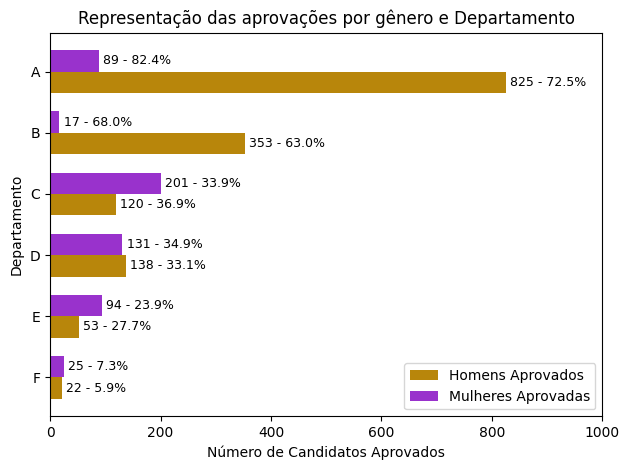

In [36]:
colunas = ['Major', 'Applicants_Female', 'Applicants_Male', 'Accepted_Female', 'Accepted_Male']
df_pro2 = df_pro[colunas]
df_pro2['Accepted_Female_pct'] = df_pro2.loc[df_pro2['Accepted_Female'] > 0, 'Accepted_Female_pct'] = (df_pro2['Accepted_Female'] / df_pro2['Applicants_Female']) * 100
df_pro2['Accepted_Male_pct'] = df_pro2.loc[df_pro2['Accepted_Male'] > 0, 'Accepted_Male_pct'] = (df_pro2['Accepted_Male'] / df_pro2['Applicants_Male']) * 100
df_pro2

plt.figure(figsize=(16, 8))
width = 0.35
majors = df_pro2['Major'].unique()
index = np.arange(len(majors))  
index = index[::-1]
fig, ax = plt.subplots()
bar_m = ax.barh(index - width/2, df_pro2['Accepted_Male'], width, label='Homens Aprovados', color='darkgoldenrod')
bar_f = ax.barh(index + width/2, df_pro2['Accepted_Female'], width, label='Mulheres Aprovadas', color='darkorchid')

# Adicionar rotulos acima das barras
for i, barra in enumerate(bar_f): 
    tamanho = barra.get_width()
    pct = df_pro2['Accepted_Female_pct'].iloc[i]
    ax.annotate( 
        f'{tamanho} -{pct: .1f}%',
        xy=(tamanho, barra.get_y() + barra.get_height() / 2), 
        xytext=(3, 0),
        textcoords="offset points", 
        ha='left', 
        va='center', 
        fontsize=9)
    
for i, barra in enumerate(bar_m): 
    tamanho = barra.get_width()
    pct = df_pro2['Accepted_Male_pct'].iloc[i]
    ax.annotate( 
        f'{tamanho} -{pct: .1f}%',
        xy=(tamanho, barra.get_y() + barra.get_height() / 2), 
        xytext=(3, 0),
        textcoords="offset points", 
        ha='left', 
        va='center', 
        fontsize=9)

plt.ylabel('Departamento')
plt.xlabel('Número de Candidatos Aprovados')
plt.xlim(0, 1000)
plt.title('Representação das aprovações por gênero e Departamento')
plt.yticks(index, majors)
plt.legend()
plt.tight_layout()
plt.show()

### 5. Comparar o número total de candidatos (admitidos e rejeitados) por gênero.

In [37]:
# Coletando informações para apresentar o comparativo
df_gender_app = df_pro[['Major','Applicants_Male','Applicants_Female']]

# Realizando a traducao dos valores
cols = df_gender_app.columns.to_list()
pos = cols.index('Major')
cols[pos] = 'Departamento'
df_gender_app.columns = cols
pos = cols.index('Applicants_Male')
cols[pos] = 'Homens'
df_gender_app.columns = cols
pos = cols.index('Applicants_Female')
cols[pos] = 'Mulheres'
df_gender_app.columns = cols

# Criando a linha com os totais 
totais = pd.DataFrame(
    { 'Departamento': ['Total']
     , 'Homens': [df_gender_app['Homens'].sum()]
     , 'Mulheres': [df_gender_app['Mulheres'].sum()]
    }) 

# Adicionando a linha de totais 
df_gender_app = pd.concat([df_gender_app, totais], ignore_index=True)

df_gender_app['Homens Dep%'] = df_gender_app.loc[df_gender_app['Homens'] > 0, 'Homens Dep%'] = (df_gender_app['Homens'] / (df_gender_app['Homens'] + df_gender_app['Mulheres'])) * 100
df_gender_app['Mulheres Dep%'] = df_gender_app.loc[df_gender_app['Mulheres'] > 0, 'Mulheres Dep%'] = (df_gender_app['Mulheres'] / (df_gender_app['Homens'] + df_gender_app['Mulheres'])) * 100

df_gender_app['Homens Geral%'] = df_gender_app.loc[df_gender_app['Homens'] > 0, 'Homens Geral%'] = (df_gender_app['Homens'] / df_gender_app['Homens'].iloc[6]) * 100
df_gender_app['Mulheres Geral%'] = df_gender_app.loc[df_gender_app['Mulheres'] > 0, 'Mulheres Geral%'] = (df_gender_app['Mulheres'] / df_gender_app['Mulheres'].iloc[6]) * 100

df_gender_app

,Departamento,Homens,Mulheres,Homens Dep%,Mulheres Dep%,Homens Geral%,Mulheres Geral%
0,A,1138,108,91.332263,8.667737,37.882823,5.885559
1,B,560,25,95.726496,4.273504,18.641811,1.362398
2,C,325,593,35.403050,64.596950,10.818908,32.316076
3,D,417,375,52.651515,47.348485,13.881491,20.435967
4,E,191,393,32.705479,67.294521,6.358189,21.416894
5,F,373,341,52.240896,47.759104,12.416778,18.583106
6,Total,3004,1835,62.078942,37.921058,100.000000,100.000000


### 6. Comparar as taxas de admissão por departamento e gênero.

In [38]:
# Criando novas colunas para trazer valores de taxas de Admissão de Mulheres e Homens
df_pro['Admission_Rate_Female'] = df_pro['Accepted_Female'] / df_pro['Applicants_Female'] * 100
df_pro['Admission_Rate_Male'] = df_pro['Accepted_Male'] / df_pro['Applicants_Male'] * 100

<Figure size 1000x600 with 0 Axes>

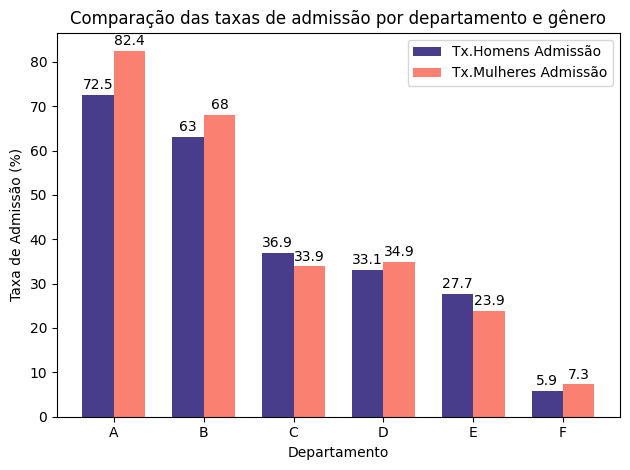

In [39]:
plt.figure(figsize=(10, 6))
width = 0.35
majors = df_pro['Major'].unique()
index = np.arange(len(majors))
fig, ax = plt.subplots()
bar_mr = ax.bar(index - width/2, df_pro['Admission_Rate_Male'].values.round(1), width, label='Tx.Homens Admissão', color = 'darkslateblue')
bar_fr = ax.bar(index + width/2, df_pro['Admission_Rate_Female'].values.round(1), width, label='Tx.Mulheres Admissão', color = 'salmon')
plt.xlabel('Departamento')
plt.ylabel('Taxa de Admissão (%)')
plt.title('Comparação das taxas de admissão por departamento e gênero')
plt.bar_label(bar_mr, padding=2)
plt.bar_label(bar_fr, padding=2)
plt.xticks(index, majors)
plt.legend()
plt.tight_layout()
plt.show()

Aqui é possivel notar as Taxas de Admissão de Mulheres é bem maior que as dos homens, com exceção dos departamentos **C** e **E** , mas a tendencia é que a taxa de aprovação se iguale quando o número de aplicantes masculinos e femininos estão balanceados. Quando há desbalanceamento na quantidade de aplicantes, no caso **A** e **B**, onde há um numero muito pequeno de mulheres aplicantes e um número muito grande de homens aplicantes, a taxa de aprovação feminina se sobresai, mediante a taxa de aprovação masculina.

### 7. Comparar as taxas de admissão agregadas e desagregadas por departamento.

In [40]:
Total_adm = df_pro['Total_Accepted']/df_pro['Total_Applicants']
Total_adm = Total_adm.sum()/6 * 100
print(f'Porcentagem de Admissão Geral é de: {Total_adm:.2f}%')

Porcentagem de Admissão Geral é de: 39.55%


In [41]:
df_gran_adm = df_pro[['Major' ,'Total_Accepted','Total_Applicants']]
df_gran_adm ['Admission_Rate_Major'] = df_gran_adm['Total_Accepted'] / df_gran_adm['Total_Applicants'] * 100
df_gran_adm

,Major,Total_Accepted,Total_Applicants,Admission_Rate_Major
0,A,914,1246,73.354735
1,B,370,585,63.247863
2,C,321,918,34.967320
3,D,269,792,33.964646
4,E,147,584,25.171233
5,F,47,714,6.582633


### 8. Verificar a relação entre o número de candidatos e as taxas de admissão/rejeição por gênero e departamento.

In [42]:
df_pro['Rejected_Rate_Female'] = df_pro['Rejected_Female'] / df_pro['Applicants_Female'] * 100
df_pro['Rejected_Rate_Male'] = df_pro['Rejected_Male'] / df_pro['Applicants_Male'] * 100

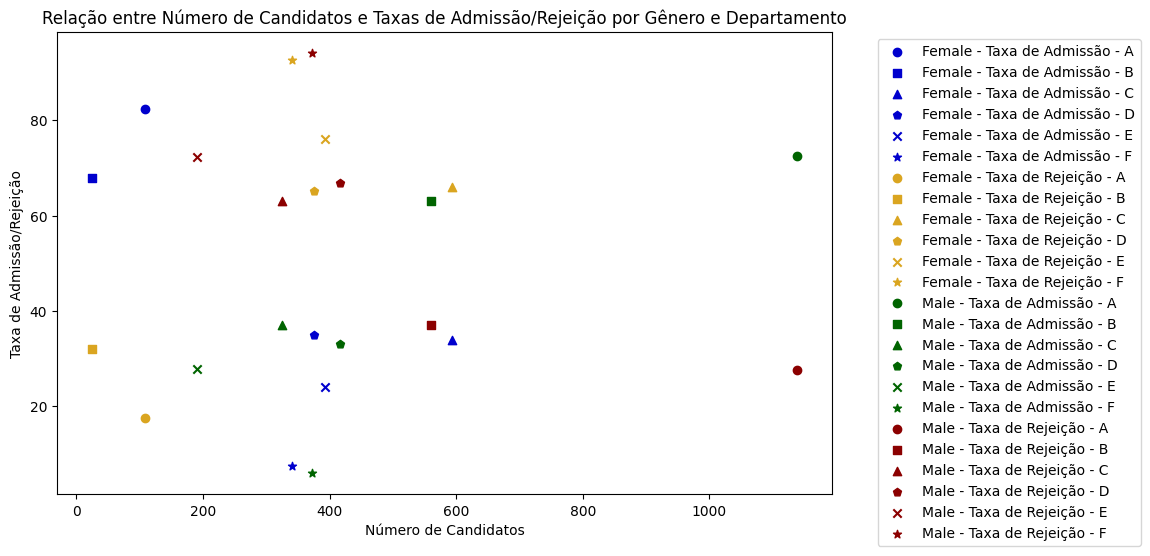

In [43]:
# --- Criando um dataframe taxas_combinadas --- #

taxas_combinadas = df_pro.melt(
    id_vars=['Major'], 
    value_vars=['Applicants_Female', 'Applicants_Male', 'Admission_Rate_Female', 'Admission_Rate_Male', 'Rejected_Rate_Female', 'Rejected_Rate_Male'],
    var_name='Categoria',
    value_name='Valor'
)

taxas_combinadas['Gender'] = taxas_combinadas['Categoria'].str.extract(r'(Female|Male)')
taxas_combinadas['Taxa'] = taxas_combinadas['Categoria'].str.extract(r'(Admission_Rate|Rejected_Rate|Applicants)')
taxas_combinadas = taxas_combinadas.drop('Categoria', axis=1)
taxas_combinadas = taxas_combinadas.pivot_table(index=['Major', 'Gender'], columns='Taxa', values='Valor').reset_index()
taxas_combinadas.columns.name = None
taxas_combinadas = taxas_combinadas.rename(columns={'Admission_Rate': 'Taxa de Admissão', 'Rejected_Rate': 'Taxa de Rejeição', 'Applicants': 'Total'})

# 6. Criando o gráfico de dispersão
fig, ax = plt.subplots(figsize=(10, 6))

marcadores_departamento = {
    'A': 'o',
    'B': 's',
    'C': '^',
    'D': 'p',
    'E': 'x',
    'F': '*'
}

cores_genero_admissao = {
    ('F', 'Taxa de Admissão'): 'mediumblue',  # Cor fixa para F - Taxa de Admissão Feminino
    ('F', 'Taxa de Rejeição'): 'goldenrod',  # Cor fixa para F - Taxa de Rejeição Feminino
    ('M', 'Taxa de Admissão'): 'darkgreen',  # Cor fixa para M - Taxa de Admissão Masculino
    ('M', 'Taxa de Rejeição'): 'darkred'  # Cor fixa para M - Taxa de Rejeição Masculino
}

for genero in taxas_combinadas['Gender'].unique():
    genero_key = 'F' if genero == 'Female' else 'M' 
    for admissao in ['Taxa de Admissão', 'Taxa de Rejeição']:
        for departamento in taxas_combinadas['Major'].unique():
            dados_genero_admissao = taxas_combinadas[(taxas_combinadas['Gender'] == genero) & (taxas_combinadas['Major'] == departamento)]
            ax.scatter(dados_genero_admissao['Total'], dados_genero_admissao[admissao], label=f'{genero} - {admissao} - {departamento}', marker=marcadores_departamento[departamento], color=cores_genero_admissao[(genero_key, admissao)])

ax.set_xlabel('Número de Candidatos')
ax.set_ylabel('Taxa de Admissão/Rejeição')
ax.set_title('Relação entre Número de Candidatos e Taxas de Admissão/Rejeição por Gênero e Departamento')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Colocando a Legenda fora da caixa do gráfico para melhor visualização.
plt.show()

### 9. Comparar as taxas de admissão agregadas para homens e mulheres.

In [44]:
a1 = df_pro['Accepted_Male'].sum()
a2 = df_pro['Accepted_Female'].sum()
b1 = df_pro['Rejected_Male'].sum()
b2 = df_pro['Rejected_Female'].sum()
c1 = df_pro['Applicants_Male'].sum()
c2 = df_pro['Applicants_Female'].sum()

In [45]:
e1 = a1/c1 * 100
e2 = a2/c2 * 100
f1 = b1/c1 * 100
f2 = b2/c2 * 100
print(f'Porcentagem de Admissão Masculina Geral é de: {e1:.2f}%')
print(f'Porcentagem de Admissão Feminina Geral é de: {e2:.2f}%')
print(f'Porcentagem de Rejeição Masculina Geral é de: {f1:.2f}%')
print(f'Porcentagem de Rejeição Feminina Geral é de: {f2:.2f}%')

Porcentagem de Admissão Masculina Geral é de: 50.30%
Porcentagem de Admissão Feminina Geral é de: 30.35%
Porcentagem de Rejeição Masculina Geral é de: 49.70%
Porcentagem de Rejeição Feminina Geral é de: 69.65%


Conseguimos enxergar o paradoxo, analisando de forma agregada, entendemos que a Admissão Masculina se sobressai perante a Feminina. Porém ao revisitarmos o **item 6**, partindo de uma analise desagregada e mais granularizada, entendemos que a Admissão Feminina se sobressai perante a Masculina. 

### 10. Analisar como as taxas de admissão de homens e mulheres variam entre os departamentos.

Visualmente temos a resposta no **item 6**, do qual mostra um grafico com barras agrupadas , indicando a taxa de aprovação por departamento e gênero, nele conseguimos verificar que há disparidades entre departamentos, especificamente onde a proporção de número de candidatos homens e mulheres são grandes se comparados onde a proporção de cadidatos homens e mulheres são mais equilibrados. O gráfico do **item4** também ajuda, se combinado com o **item6**.

### 11. Identificar quais departamentos têm as maiores e menores taxas de rejeição.

In [46]:
df_pro['Total_Rate_Rejected'] = df_pro['Total_Rejected'] / df_pro['Total_Applicants'] * 100
df_pro['Total_Rate_Accepted'] = df_pro['Total_Accepted'] / df_pro['Total_Applicants'] * 100
tx_rejected = df_pro[['Major','Total_Rate_Rejected']]
tx_rejected.sort_values('Total_Rate_Rejected', ascending = False)

,Major,Total_Rate_Rejected
5,F,93.417367
4,E,74.828767
3,D,66.035354
2,C,65.032680
1,B,36.752137
0,A,26.645265


<Figure size 1000x600 with 0 Axes>

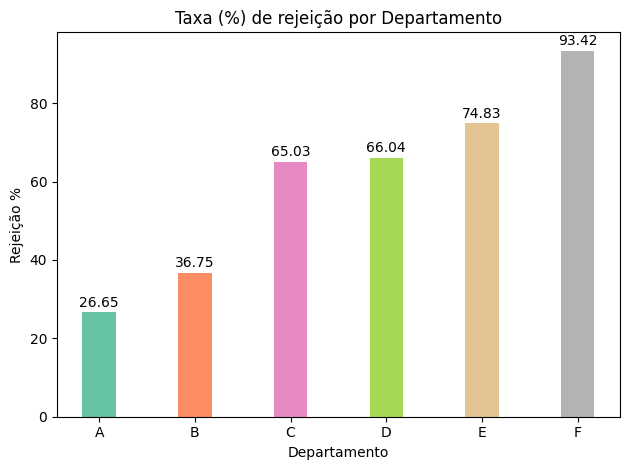

In [47]:
plt.figure(figsize=(10, 6))
width = 0.35
majors = tx_rejected['Major'].values
index = np.arange(len(majors))
num_majors = len(majors)
colors = plt.cm.Set2(np.linspace(0, 1, num_majors))
tx_rjt = tx_rejected['Total_Rate_Rejected'].values.round(2)
fig, ax = plt.subplots()
bar_tx_rejected = ax.bar(index, tx_rjt, width, label = 'Tx. de Rejeição por Departamento', color = colors)
ax.set_xticks(index)
ax.set_xticklabels(majors, rotation=0)
plt.xlabel('Departamento')
plt.ylabel('Rejeição %')
plt.title('Taxa (%) de rejeição por Departamento')
plt.bar_label(bar_tx_rejected, padding=2)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Departamentos F e E lideram o ranking de rejeições, respectivamente 93,42% e 74,83%.Enquanto os Departamentos B e A possuem as menores taxas de rejeição sendo respectivamente 36,75% e 26,55%.

### 12. Avaliar a proporção de inscrições feitas por homens e mulheres nos departamentos mais e menos competitivos.

In [48]:
# Calculando as proporções de candidaturas feitas por mulheres e homens
df_pro['Proportion_Female'] = df_pro['Applicants_Female'] / df_pro['Total_Applicants'] * 100
df_pro['Proportion_Male'] = df_pro['Applicants_Male'] / df_pro['Total_Applicants'] * 100
# Ordenando pelo número total de candidatos para identificar os departamentos mais e menos competitivos
df_sorted = df_pro[['Major', 'Proportion_Female', 'Proportion_Male','Applicants_Female','Applicants_Male', 'Total_Applicants']] \
    .sort_values(by='Total_Applicants', ascending=False).reset_index(drop = True)  # Ordenando pelos departamentos com mais candidatos


df_sorted


,Major,Proportion_Female,Proportion_Male,Applicants_Female,Applicants_Male,Total_Applicants
0,A,8.667737,91.332263,108,1138,1246
1,C,64.596950,35.403050,593,325,918
2,D,47.348485,52.651515,375,417,792
3,F,47.759104,52.240896,341,373,714
4,B,4.273504,95.726496,25,560,585
5,E,67.294521,32.705479,393,191,584


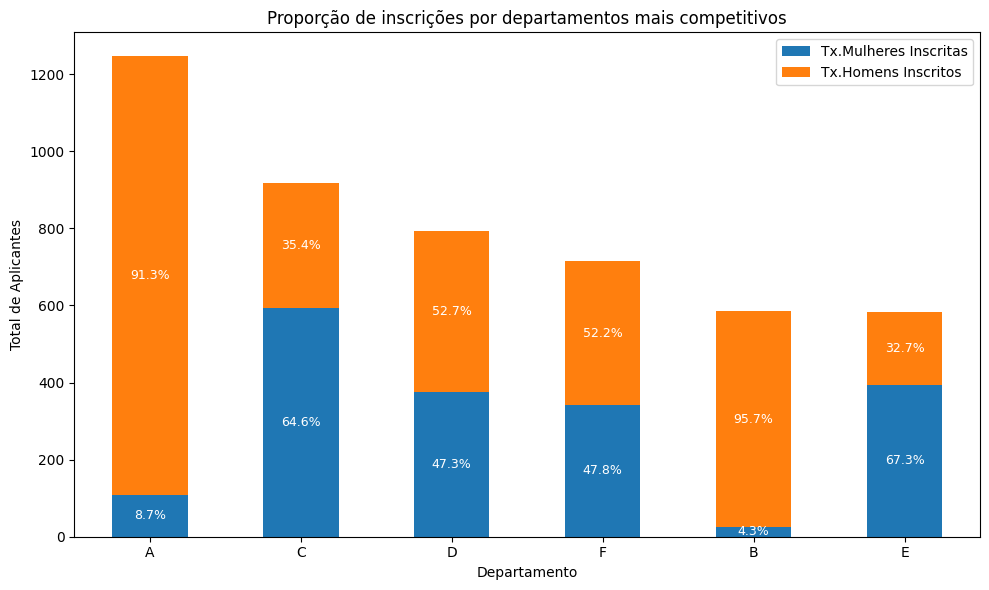

In [49]:
ax = df_sorted[['Major', 'Applicants_Female', 'Applicants_Male']].set_index('Major').plot(kind='bar', stacked=True, figsize=(10, 6))
for i in range(len(df_sorted['Major'])):
    # Porcentagem de feminino
    ax.text(i, df_sorted['Applicants_Female'][i] / 2, f"{df_sorted['Proportion_Female'][i]:.1f}%", ha='center', va='center', color='white', fontsize=9)
    # Porcentagem de masculino
    ax.text(i, df_sorted['Applicants_Female'][i] + df_sorted['Applicants_Male'][i] / 2, f"{df_sorted['Proportion_Male'][i]:.1f}%", ha='center', va='center', color='white', fontsize=9)
ax.legend(['Tx.Mulheres Inscritas','Tx.Homens Inscritos'])
plt.title("Proporção de inscrições por departamentos mais competitivos")
plt.ylabel("Total de Aplicantes")
plt.xlabel('Departamento')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 13. Comparar as taxas de admissão gerais com as taxas de admissão por departamento.

In [50]:
# Utilizando as variáveis do item 9 para análise: 
Total_accepted = a1 + a2
applicants_sum = c1 +c2
tx_geral_admission = Total_accepted / applicants_sum * 100
print(f'A Taxa de Admissão Geral é de: {tx_geral_admission:.2f}%')

A Taxa de Admissão Geral é de: 42.74%


In [51]:
# Essa análise ajuda a entender as diferenças entre a taxa de admissão agregada e as taxas específicas de cada departamento.
# Comparando as taxas de admissão gerais com as taxas por departamento
tx_adm_major = df_pro[['Major','Total_Rate_Accepted']]
print("\nTaxas de Admissão por Departamento:\n", tx_adm_major)


Taxas de Admissão por Departamento:
   Major  Total_Rate_Accepted
0     A            73.354735
1     B            63.247863
2     C            34.967320
3     D            33.964646
4     E            25.171233
5     F             6.582633


A taxa geral de admissão fica aproximadamente em torno de **42,74 %**,considerando uma análise agregada, de forma geral. Mas ao estratificar a análise por Departamentos verificamos que o comportamento de Admissões foge discrepantemente do esperado, que seria a taxa geral de admissão. Olhando para o departamento **'A'** ele tem uma taxa de admissão de **73%**, considerado o valor máximo dessa análise desagregada. O departamento **'F'** já por sua vez, possui uma taxa de admissão muito menor, sendo ele aproximadamente de **6,58%**, considerado o valor mínimo dessa análise desagregada. O comportamento dessa diferença nas taxas de admissão por departametos mostra a competitividade é maior que os demais departamentos 

### 14. Verificar se existem preferências de departamentos por gênero que podem influenciar os resultados observados.

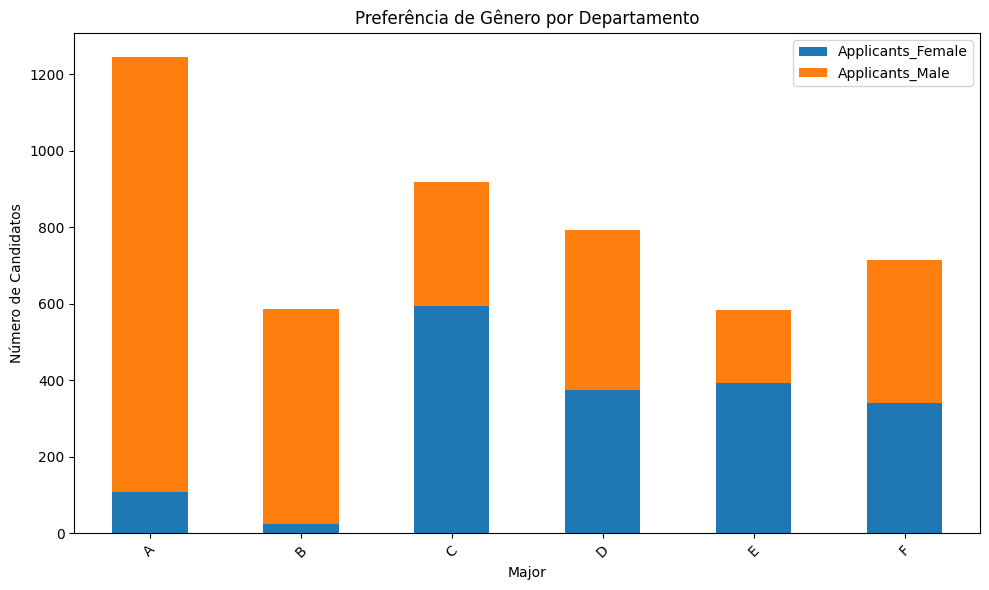

In [52]:
# Verificando preferências de departamentos por gênero
df_pro[['Major', 'Applicants_Female', 'Applicants_Male']].set_index('Major').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Preferência de Gênero por Departamento")
plt.ylabel("Número de Candidatos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Questionamentos a serem respondidos durante a análise de dados

### 1. Há departamentos ou gêneros que apresentam taxas de admissão ou rejeição desproporcionalmente altas ou baixas?

Sim. O departamento F apresenta taxas de aprovação muito baixas para ambos os gêneros, 5,9% para homens e 7,3% para mulheres, totalizando uma porcentagem de aprovação geral de 6,6%. Ao analisar as taxas de admissão e rejeição, podemos descobrir que alguns departamentos apresentam taxas de admissão ou rejeição mais altas ou mais baixas do que outros. Usamos as colunas como 'Accepted_Female', 'Accepted_Male', 'Rejected_Female', e 'Rejected_Male' para calcular as taxas de admissão e rejeição por gênero e departamento.

### 2. Há equilíbrio na distribuição de gêneros nos departamentos?

A falta de equilíbrio é evidente, pois a proporção das aplicações de candidatos do gênero masculino é significativamente maior do que o total de aplicações das candidatas mulheres.
A proporção do total de aplicações dos homens chega a ser quase 39% maior que o total das aplicações das mulheres.

### 3. Como os padrões de admissão diferem entre os departamentos e gêneros?

***(item 7 da Análise)*** Os departamentos A e B existem as maiores taxas de admissão totais, sendo para o departamento A de 73,3% e para o B de 63,2%, mostrando que são departamentos com mais facilidade para admissão de alunos, algo diferente dos departamentos C D e E, nos quais ficam abaixo da média de admissão geral de 39,5%; O departamento C teve 34,9% de admissão geral, o D teve 33,9% de admissão geral e o E teve 25,1% de admissão geral, tornando esses 3 departamentos mais difíceis de entrar comparado com os departamentos A e B. Por fim, o departamento F é o que possui a menor taxa geral de admissão, sendo ela de apenas 6,5% e, portando, se tornando odepartamento mais díficil de ser admitido.

Em relação a admissão entre gêneros, ***(itens 6 e 9 da Análise)***, existe uma notável diferença na taxa de admissão geral masculina e na feminina, sendo 50,3% para homens e 30,3% para mulheres, mostrando que no geral é mais comum ter homens admitidos nos departamentos devido a maior quantidade de inscrições masculinas. Porém, ao dividir essas taxas de admissão por gênero e por departamento é possível observar que elas são mais equilibradas. Os departamentos que existem uma diferença maior são o A e o B, onde a admissão de homens é de 72,5% e 63% respectivamente, e para mulheres é de 82,4% e 68% respectivamente, então apesar da grande maioria dos inscritos para esses departamentos serem homens, a porcentagem de admissão deles é menor que das mulheres. Nos departamentos mais difíceis de entrar a diferença entre homens e mulheres é bem menor tanto para a taxa quanto para a quantidade de inscritos: no departamento C a admissão de homens é de 36,9% e de mulheres é de 33,9%, no departamento D a admissão de homens é de 33,1% e de mulheres é de 34,9%, no departamento E a admissão de homens é de 27,7% e de mulheres é de 23,9% e no departamento F a admissão de homens é de 5,9% e de mulheres é de 7,3%; A diferença na taxa de admissão de homens e mulheres não chega a ser tanta quanto nos departamentos A e B.

### 4. Existe um viés aparente contra algum gênero?

Caso seja analisado apenas a taxa geral de admissão e rejeição por gênero iria ser possível inferir que existe um viés contra o sexo feminino pois apenas 30,3% das mulheres tem admissão dentro da universidade, porém isso seria uma análise incompleta pois dentro de cada departamento essa diferença não é tão grande, sendo os que tem mais diferença os departamentos A e B e estes possuem taxas maiores de aprovação de mulheres. Portanto, ao comparar as taxas de admissão por gênero e por departamento é possível ver que no fim não existe um víes contra algum gênero, a taxa maior de aprovação de homens é devido ao fato de existir uma quantidade bem maior de inscrições por homens que por mulheres.

### 5. Há departamentos mais favoráveis a um gênero específico?

Com base na análise realizada, percebe-se que não há, de fato, um viés para admissões nos departamentos, mas sim uma preferência maior por determinados gêneros em certos departamentos, ocasionando um maior favorecimento desse gênero no respectivo departamento.

Por exemplo, nos departamentos onde o percentual de aplicações femininas é maior Departamentos C e E *(vide itens 13 e 14)*, o percentual de aprovação feminina também é superior *(vide item 6)*. Já nos departamentos A, B e D, onde o percentual de aplicações masculinas *(vide itens 13 e 14)* é maior, o percentual de homens aprovados também é superior *(vide item 6)*.

Por fim, o único departamento onde não se observou essa mesma situação foi o Departamento F, que possui o maior percentual de rejeição de todos, sendo, portanto, o mais dificil de ser aprovado. Mesmo tendo um número maior de aplicações masculinas *(vide itens 13 e 14)*, a taxa de aprovação feminina é superior *(vide item 6)*.

Em conclusão, não é possível afirmar que existam, de fato, departamentos favoráveis a algum gênero específico.

### 6. Quais departamentos são mais competitivos e como isso afeta os gêneros?

Com base na análise, percebe-se que os departamentos mais competitivos são, respectivamente, o Departamento F, com apenas 6,58% de admissões, o Departamento E, com 25,17%, o Departamento D, com 33,96%, e o Departamento C, com 34,96%, tendo como base a taxa geral de aprovações de 39,55% *(vide item 7)*. 

Devido à extrema concorrência nesses departamentos, as taxas de aprovação por gênero tendem a ser próximas umas das outras. Por exemplo, no Departamento F, apenas 6,58% dos aplicantes foram aprovados, e para os gêneros, 7,3% das mulheres e 5,9% dos homens foram aprovados. O mesmo ocorre nos demais departamentos competitivos, mostrando que, na verdade, existe uma certa proximidade quando o número de inscrições por gênero tende a ser próximo *(vide item 6)*.

### 7. Como as conclusões mudam ao desagregar os dados por departamento?

Considerando a análise agregada, olhando para os números gerais, leva-se a uma tendência enganosa em concluir que há preferencia em admissão para homens, representando numeros superiores quando comparado de forma agregada a taxa de aprovação para mulheres ***(vide item 9)***. Assim da mesma forma segue o padrão quando analisamos de forma agregada a taxa de aprovação de departamentos ***(vide item 13)***. Porém esse comportamento se reverte ao fazer análises mais estratificadas, como exemplo as análises dos ***itens 6 e 13*** , os números mostram o oposto do que esperávamos, no caso da taxa de admissão para mulheres por departamento em sua análise desagragada, mostra superior as taxas de admissão dos homens por departamento, assim como uma análise desagregada por departamento considerando somente a taxa de aprovação (homens + mulheres), destoante do esperando quando se analisa de forma agregada.


### 8. Justifique o viés de gênero nas admissões de pós-graduação de Berkeley.

Pelas análises realizadas levamos a entender que não há discriminação contra as mulheres, basicamente constatamos o fenômeno do ***Paradoxo de Simpson***. Sendo assim um viés errôneo e tendencioso ao analisar de forma agregada e concluir que homens são mais aceitos que Mulheres. Na sua análise desagregada por departamentos, concluímos que a taxa de aceitação de Mulheres é superior a dos Homens. O grande detalhe deste fenômeno se dá pela maior de proporção de mulheres que aplicaram para departamentos com menores taxas de aceitação, enquanto os homens tiveram maior proporção para aplicação em departamentos com maiores taxas de aceitação. Assim concluindo que não houve viés de gênero.